## Scrapper

In [38]:
import pandas as pd
from matplotlib import pyplot as plt

indices = {
    'nameIndex': 0,
    'price' : 1,
    'discountPrice' : 2,
    'review' : 3,
    'numberOfPositiveReviews' : 4,
    'numberOfAllReviews' : 5,
    'tag1' : 6,
    'tag2' : 7,
    'tag3' : 8
    }

0      286676.0
1     6765717.0
2      189813.0
3      493439.0
4       89603.0
        ...    
95      95779.0
96     915549.0
97     195277.0
98     109845.0
99      29956.0
Name: numberOfPositiveReviews, Length: 100, dtype: float64


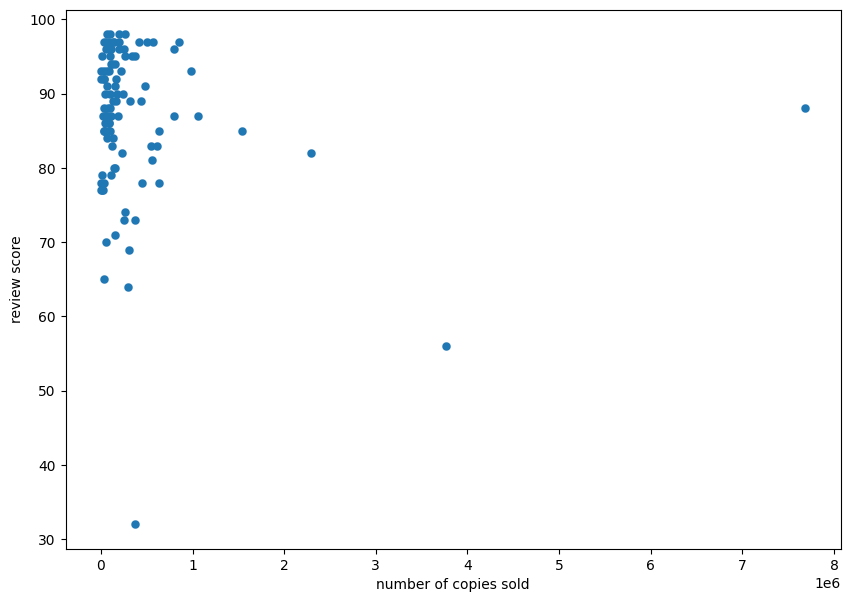

In [56]:
df = pd.read_csv('gamesprices.csv')

print(df['numberOfPositiveReviews'])

fig, ax = plt.subplots(figsize=(10,7))
ax.set_xlabel('number of copies sold')
ax.set_ylabel('review score')
ax.plot(df['numberOfAllReviews'], df['review'],marker='o', linestyle='', markeredgewidth=0.1)